Importing Important Libraries

In [62]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd #Python data analysis library
import numpy as np #Python scientific computing
import matplotlib.pyplot as plt #For plotting
import matplotlib.mlab as mlab
import seaborn as sns #Python visualization library
from scipy.optimize import curve_fit
from IPython.display import display, HTML
import numpy as np
df=pd.read_csv('transaction_data.csv')

C:\Users\Utkarsh Pratap Singh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df['ItemDescription'].nunique()   #total unique items

4223

In [3]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [20]:
data.columns #column names for reference

Index(['UserId', 'TransactionId', 'TransactionTime', 'ItemCode',
       'ItemDescription', 'NumberOfItemsPurchased', 'CostPerItem', 'Country'],
      dtype='object')

Checking for NAN/Null values

In [4]:
df.isnull().sum()

UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
ItemDescription           2908
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64

There are 2908 null values in item description, they are seen in cell below 

In [5]:
df[df['ItemDescription'].isnull()==True].head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
322,-1,6314803,Mon Jan 14 11:15:00 IST 2019,495159,NaN,9,0.0,United Kingdom
762,-1,6206420,Mon Nov 05 05:34:00 IST 2018,434364,NaN,3,0.0,United Kingdom
1080,-1,6297863,Sat Jan 05 12:06:00 IST 2019,1782417,NaN,-3,0.0,United Kingdom
2204,-1,6142961,Mon Sep 10 09:41:00 IST 2018,458157,NaN,-240,0.0,United Kingdom
2210,-1,6176445,Mon Oct 08 10:06:00 IST 2018,1666056,NaN,108,0.0,United Kingdom


In [98]:
data=df.dropna() #making a copy of dataset without nan values

In [13]:
data[data['CostPerItem']<0]  #to remove the negative CostPerItem rows


,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
35768,-1,6195046,Wed Oct 24 10:51:00 IST 2018,-1,Adjust bad debt,3,-15265.64,United Kingdom
768321,-1,6195057,Wed Oct 24 10:52:00 IST 2018,-1,Adjust bad debt,3,-15265.64,United Kingdom
966149,-1,6195057,Wed Oct 24 10:52:00 IST 2018,-1,Adjust bad debt,3,-15265.64,United Kingdom
988377,-1,6195046,Wed Oct 24 10:51:00 IST 2018,-1,Adjust bad debt,3,-15265.64,United Kingdom


In [15]:
data[data['NumberOfItemsPurchased']<0]  #to remove the negative NumberOfItemsPurchased rows

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
69,300909,6015757,Tue May 29 14:14:00 IST 2018,466452,FOUR HOOK WHITE LOVEBIRDS,-3,2.90,United Kingdom
135,319683,6036228,Sat Jun 16 08:28:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,-24,17.60,United Kingdom
148,-1,6108674,Tue Aug 14 07:12:00 IST 2018,1780905,wet damaged,-288,0.00,United Kingdom
329,321531,5925150,Sat Feb 24 11:05:00 IST 2018,446418,VICTORIAN SEWING BOX LARGE,-3,15.12,United Kingdom
330,260715,6165940,Sun Sep 30 08:26:00 IST 2018,488061,TREASURE TIN GYMKHANA DESIGN,-3,2.88,Australia
...,...,...,...,...,...,...,...,...
1083641,260715,6165940,Sun Sep 30 08:26:00 IST 2018,461454,SET OF 36 PAISLEY FLOWER DOILIES,-3,2.01,Australia
1083663,331485,6108982,Tue Aug 14 10:15:00 IST 2018,486255,KNICKERBOCKERGLORY MAGNET ASSORTED,-3,1.15,United Kingdom
1083719,315693,6146283,Fri Sep 14 07:54:00 IST 2018,448644,PEACE SMALL WOOD LETTERS,-3,9.32,United Kingdom
1083738,-1,6332865,Tue Jan 22 13:58:00 IST 2019,1528842,check,-108,0.00,United Kingdom


In [24]:
#taking only positive CostPerItem and NumberOfItemsPurchased
data=data[data['CostPerItem']>0]
data=data[data['NumberOfItemsPurchased']>0] 
data.reset_index(inplace =True)

To check which all products have negative ItemCode

In [101]:
data[data['ItemCode']==-1]['ItemDescription'].unique()

array(['POSTAGE', 'Discount', 'DOTCOM POSTAGE', 'AMAZON FEE', 'Manual',
       'SAMPLES', 'GIRLS PARTY BAG', 'Bank Charges', 'BOYS PARTY BAG',
       'Adjust bad debt', 'CRUK Commission', 'PADS TO MATCH ALL CUSHIONS'],
      dtype=object)

Apart from GIRLS PARTY BAG, BOYS PARTY BAG, and PADS TO MATCH ALL CUSHIONS, other products are of no use, most of them are related to basic transaction or fees 

In [26]:
#Changing the ItemCode of 'BOYS PARTY BAG', 'GIRLS PARTY BAG' and 'PADS TO MATCH ALL CUSHIONS' to 1,2 and 3 respectively from previously set to -1
for i in range(len(data['ItemDescription'])):
    if data['ItemDescription'][i] =='BOYS PARTY BAG':
        data['ItemCode'][i]=1
    if data['ItemDescription'][i] =='GIRLS PARTY BAG':
        data['ItemCode'][i]=2
    if data['ItemDescription'][i] =='PADS TO MATCH ALL CUSHIONS':
        data['ItemCode'][i]=3

C:\Users\Utkarsh Pratap Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Utkarsh Pratap Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Utkarsh Pratap Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
data=data[data['ItemCode']>0] #now removing the rows with negative ItemCode 

In [28]:
data=data.reset_index()

# This code cell is not important, I just tried to change the TransactionTime column type to be a DateTime object, You can continue with the cell after but if you want to run,then it'll take 10-15 mins to run this, so better to skip this 

In [ ]:
months={'Jan':'01',
        'Feb':'02',
        'Mar':'03',
        'Apr':'04',
        'May':'05',
        'Jun':'06',
        'Jul':'07',
        'Aug':'08',
        'Sep':'09',
        'Oct':'10',
        'Nov':'11',
        'Dec':'12'}
for idx,dates in enumerate(data['TransactionTime']):
    dates=dates.replace('IST','')
    date=dates[21:25]+'-'+months[dates[4:7]]+'-'+dates[8:10]+' '+dates[11:19]
    data['TransactionTime'][idx]=date


In [30]:
data.head()

,level_0,index,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,0,0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,1,1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,2,2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,3,3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,4,4,-1,6143225,2018-09-10 11:58:00,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [31]:
data.columns

Index(['level_0', 'index', 'UserId', 'TransactionId', 'TransactionTime',
       'ItemCode', 'ItemDescription', 'NumberOfItemsPurchased', 'CostPerItem',
       'Country'],
      dtype='object')

In [34]:
#changing the ItemDescription to a string and stripping it. Also doing other important typecastings and dropping the two waste index columns 
data['ItemDescription']=data['ItemDescription'].str.strip()
data.dropna(axis=0, subset=['TransactionId'],inplace=True)
data['TransactionId']=data['TransactionId'].astype('str')
data[~data['TransactionId'].str.contains('C')]
data.drop(['level_0','index'],inplace=True,axis=1)

In [35]:
data.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,2018-09-10 11:58:00,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [52]:
#Making a basket dataframe in which all the Transactions are reported with the total of each products separately they bought as the columns 
basket=(data.groupby(['TransactionId','ItemCode'])['NumberOfItemsPurchased'].sum().unstack().reset_index().fillna(0).set_index('TransactionId'))
basket.head()

ItemCode,1,2,3,42,63,84,1449,1470,1596,2310,...,1894242,1894284,1894305,1894326,1894368,1894389,1894410,1894431,1894452,1894494
TransactionId,,,,,,,,,,,,,,,,,,,,,
5900015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5900026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5900037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5900048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5900059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#Hot Encoding the transacted products to signify they are bought or not
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
basket_sets=basket.applymap(encode_units)
basket_sets.head()

ItemCode,1,2,3,42,63,84,1449,1470,1596,2310,...,1894242,1894284,1894305,1894326,1894368,1894389,1894410,1894431,1894452,1894494
TransactionId,,,,,,,,,,,,,,,,,,,,,
5900015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Using Aprori Algorithm Library to get Frequently bought Item sets

In [54]:
frequent_itemsets=apriori(basket_sets, min_support=0.020, use_colnames=True)
frequent_itemsets.head(10)

,support,itemsets
0,0.026193,(315756)
1,0.039492,(316176)
2,0.022654,(434196)
3,0.035194,(434385)
4,0.026396,(434931)
5,0.043639,(434952)
6,0.033222,(434973)
7,0.020833,(435057)
8,0.029076,(435078)
9,0.042122,(435099)


Defining Our Rules, metric used is "Lift"


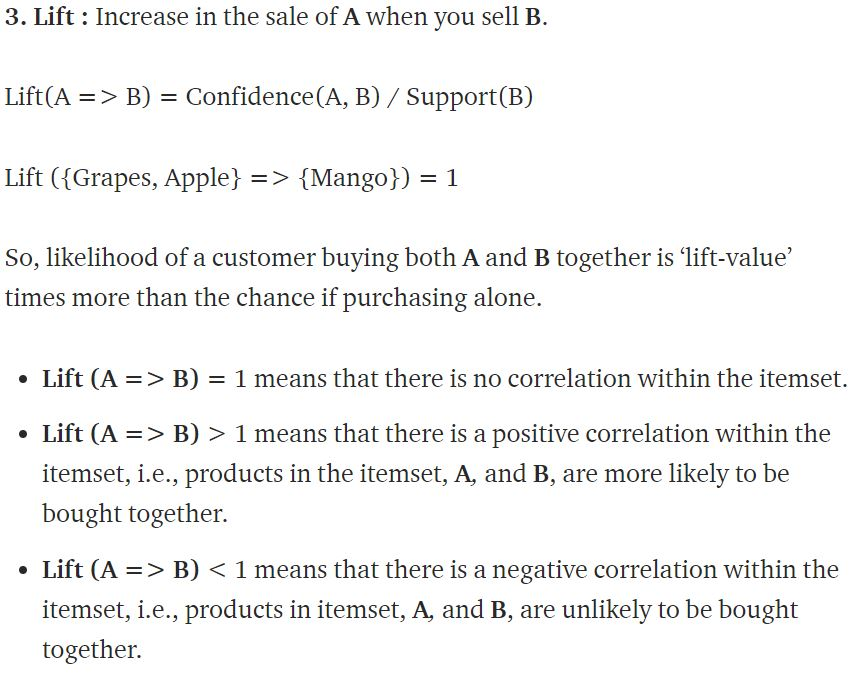

In [55]:
rules=association_rules(frequent_itemsets, metric='lift',min_threshold=0.1)

In [56]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(434952),(460551),0.043639,0.059871,0.022704,0.520278,8.690050,0.020092,1.959738
1,(460551),(434952),0.059871,0.043639,0.022704,0.379223,8.690050,0.020092,1.540587
2,(434952),(470106),0.043639,0.061590,0.021693,0.497103,8.071192,0.019005,1.866009
3,(470106),(434952),0.061590,0.043639,0.021693,0.352217,8.071192,0.019005,1.476360
4,(434952),(1787079),0.043639,0.134153,0.032565,0.746234,5.562580,0.026710,3.411993


In [57]:
#Sorting rules by the lift column that means more lift would be at the top with more chances of goods getting transacted together
rules=rules.sort_values(by='lift',ascending=False) 
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
215,(476658),"(476637, 476679)",0.038683,0.038784,0.027356,0.707190,18.233873,0.025856,3.282723
214,"(476637, 476679)",(476658),0.038784,0.038683,0.027356,0.705346,18.233873,0.025856,3.262522
216,(476637),"(476658, 476679)",0.051224,0.030239,0.027356,0.534057,17.661398,0.025807,2.081289
213,"(476658, 476679)",(476637),0.030239,0.051224,0.027356,0.904682,17.661398,0.025807,9.953828
138,(476658),(476637),0.038683,0.051224,0.031958,0.826144,16.128154,0.029976,5.457247


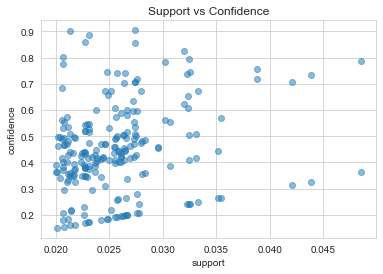

In [72]:
#variations of support vs onfidence
from matplotlib import pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()


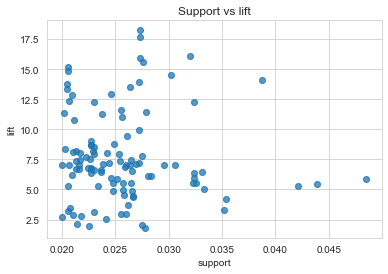

In [73]:
#variations of support vs lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs lift')
plt.show()

In [58]:
#To view all the rows if needed
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

# Now making a count dataframe in which the number of a particular item  that is purchased per user is given  

In [59]:
counts=(data.groupby(['UserId','ItemCode'])['NumberOfItemsPurchased'].sum().unstack().reset_index().fillna(0).set_index('UserId'))

In [60]:
counts.head()

ItemCode,1,2,3,42,63,84,1449,1470,1596,2310,...,1894242,1894284,1894305,1894326,1894368,1894389,1894410,1894431,1894452,1894494
UserId,,,,,,,,,,,,,,,,,,,,,
-1,282.0,282.0,0.0,48.0,24.0,6.0,6.0,6.0,18.0,54.0,...,294.0,72.0,228.0,234.0,258.0,672.0,102.0,72.0,48.0,3510.0
259266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
#to get total items purchased by a user
counts['total_bought']=counts.sum(axis=1)

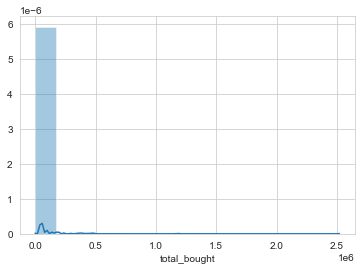

In [63]:
#get distribution of number of orders per customer
sns.set_style('whitegrid')
sns.distplot(counts["total_bought"], kde=True, norm_hist=True ,bins=15)

Here we can clearly see that the data is vastly skewed

But if we remove the values greater than 25000 in total_bought column, then we see a exponential trend in the graph from the peak

In [65]:
a=counts[counts['total_bought']<25000] 
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4160 entries, 259287 to 384027
Columns: 3297 entries, 1 to total_bought
dtypes: float64(3297)
memory usage: 104.7 MB


In [66]:
b=counts[counts['total_bought']>25000] 
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, -1 to 383271
Columns: 3297 entries, 1 to total_bought
dtypes: float64(3297)
memory usage: 4.4 MB


To put into perspective the values above 25000 are just 175 hence as opposed to 4160 below 25000, hence we can remove them to know the pattern of total items bought per customer

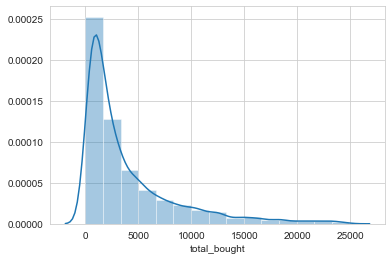

In [67]:
#get distribution of number of orders per customer
sns.set_style('whitegrid')
sns.distplot(a["total_bought"], kde=True, norm_hist=True ,bins=15)

Exponential trend is clearly visible in this graph, i.e the number of items bought by each customer decreases exponentially 

Now seeing the trend in the extremely skewed counts['total_bought'] by taking log

In [68]:
counts['log_total']=np.log(counts['total_bought'])

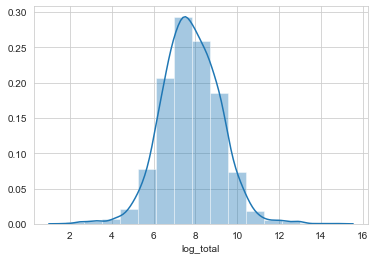

In [69]:
#get distribution of number of orders per customer
sns.set_style('whitegrid')
sns.distplot(counts["log_total"], kde=True, norm_hist=True ,bins=15)

Clearly this seems an approximate gaussian distribution centered at 8

In [70]:
#To see the counts of every item that has been bought till last date
value_counts=pd.DataFrame(data['ItemCode'].value_counts())
value_counts.reset_index(inplace=True)
value_counts.columns=['ItemCode','times_bought']
value_counts.head(10)

,ItemCode,times_bought
0,1787079,7784
1,1787583,4664
2,998886,4354
3,470883,4034
4,1786029,3590
5,1784937,3448
6,435225,3190
7,1776516,3172
8,1782459,2978
9,466137,2852


In [71]:
#to see the number of items purchased by people living in different countries
data.groupby(['Country'])['NumberOfItemsPurchased'].sum()

Country
Australia                 503400
Austria                    29064
Bahrain                     1884
Belgium                   137772
Brazil                      2136
Canada                     16572
Channel Islands            56940
Cyprus                     38154
Czech Republic              4020
Denmark                    49158
EIRE                      883008
European Community          2940
Finland                    63648
France                    667632
Germany                   708834
Greece                      9300
Hong Kong                  28608
Iceland                    14748
Israel                     26454
Italy                      48402
Japan                     156096
Lebanon                     2316
Lithuania                   3912
Malta                       5748
Netherlands              1201548
Norway                    115656
Poland                     22050
Portugal                   96918
RSA                         2106
Saudi Arabia                 480
Si

# Now doing Recommendation Task

In [74]:
type(rules['antecedents'][0])

frozenset

Since the type of antecedents and consequents are frozen set, I'll change those values to list for easier manipulations

In [75]:
for i in range(len(rules['antecedents'])):
    rules['antecedents'][i]=list(rules['antecedents'][i])
    rules['consequents'][i]=list(rules['consequents'][i])

C:\Users\Utkarsh Pratap Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Utkarsh Pratap Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
#getting the couplets of itemcode in descending order of their lift values
l=[]
for i in range(len(rules['antecedents'])):
    if len(rules['antecedents'][i])==1 and len(rules['consequents'][i])==1:
        l.append(rules['antecedents'][i]+rules['consequents'][i])
    elif len(rules['antecedents'][i])==2:
        for j in rules['antecedents'][i]:
            l.append([j]+rules['consequents'][i])
    elif len(rules['consequents'][i])==2:
        for j in rules['consequents'][i]:
            l.append(rules['antecedents'][i]+[j])    
        

In [77]:
l

[[434952, 460551],
 [460551, 434952],
 [434952, 470106],
 [470106, 434952],
 [434952, 1787079],
 [1787079, 434952],
 [434973, 1787079],
 [1787079, 434973],
 [435099, 435183],
 [435183, 435099],
 [435099, 435204],
 [435204, 435099],
 [435099, 469455],
 [469455, 435099],
 [435204, 435183],
 [435183, 435204],
 [435183, 469455],
 [469455, 435183],
 [435204, 469455],
 [469455, 435204],
 [469476, 435204],
 [435204, 469476],
 [435204, 1787079],
 [1787079, 435204],
 [435225, 435246],
 [435246, 435225],
 [435225, 435267],
 [435267, 435225],
 [435288, 435225],
 [435225, 435288],
 [435225, 470022],
 [470022, 435225],
 [435225, 470043],
 [470043, 435225],
 [470064, 435225],
 [435225, 470064],
 [435225, 487326],
 [487326, 435225],
 [435225, 487389],
 [487389, 435225],
 [435225, 1787079],
 [1787079, 435225],
 [435267, 435246],
 [435246, 435267],
 [435288, 435246],
 [435246, 435288],
 [435246, 470022],
 [470022, 435246],
 [470043, 435246],
 [435246, 470043],
 [470064, 435246],
 [435246, 470064],
 [43

In [80]:
#function to determine the next two items that the user could buy after buying 'item_bought'
priority=[]
def find_next_recommendation(item_bought):
    for i in l:
        if item_bought==i[0]:
            priority.append(i[1])
    return priority[:2]

In [82]:
#Example used is for product 434952
find_next_recommendation(434952) 

[460551, 470106]

In [87]:
antecedents=[]
for i in (l):
    if i not in antecedents:
        antecedents.append(i[0])
result=[]
for j in (antecedents):
    priority=[]
    result.append([j]+find_next_recommendation(j))
    

In [90]:
result1=pd.DataFrame(result)

In [92]:
result1.columns=['Antecedents','Consequent1','Consequent2']

In [93]:
result1

,Antecedents,Consequent1,Consequent2
0,434952,460551,470106.0
1,460551,434952,470106.0
2,434952,460551,470106.0
3,470106,434952,460551.0
4,434952,460551,470106.0
5,1787079,434952,434973.0
6,434973,1787079,NaN
7,1787079,434952,434973.0
8,435099,435183,435204.0
9,435183,435099,435204.0


So, you can clearly see that very few of the values of consequent2 are NaN, that's because there aren't any cases where after buying that antecedent, there is only one item that is being bought, albeit, I haven't removed them

# Output file generation

In [95]:
result1.to_csv(r'C:\Users\Utkarsh Pratap Singh\Desktop\Output.csv', index = False)